<a href="https://colab.research.google.com/github/anaelisabraz/LC/blob/main/Editando%20imagem%20com%20o%20cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## Introdução ao pré-processamento de imagens

Um computador enxerga uma imagem como matriz, em que cada número corresponde ao pixel da imagem

![Title](imgs/image_matrix.png)

Uma imagem pode ser representada por uma única matriz ou uma combinação de várias matrizes, sendo esta combinação uma representação de cor

![Title](imgs/rgb.png)

Esta representação é feita por espaço de cores, em que cada espaço possui uma formulação matemática para tal combinação

### Espaço de cor RGB

* 3 canais de cores (vermelho, azul e verde)
* Pixels variam de 0 (preto) a 255 (branco)
* Cada canal de cor representa uma matriz, sendo assim, por exemplo, se tivermos na matriz a cor branca, ela será representada como (255,255,255). Isto é, o valor 255 presente em todos os canais.

### Espaço CMYK
* 4 canais de cor (ciano, magenta, amarelo, preto)

![Title](imgs/cmyk.png)

### Espaço CIE-LAB

* 3 canais de cor: l(luminância), a e b (cores)
![Title](imgs/cie_lab.png)

In [12]:
img = cv2.imread('/content/hg.jfif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img

(183, 275, 3)


array([[[  6,   6,  16],
        [  6,   6,  16],
        [  6,   6,  16],
        ...,
        [  6,   6,  16],
        [  6,   6,  16],
        [  6,   6,  16]],

       [[  6,   6,  16],
        [  6,   6,  16],
        [  6,   6,  16],
        ...,
        [  6,   6,  16],
        [  6,   6,  16],
        [  6,   6,  16]],

       [[  6,   6,  16],
        [  6,   6,  16],
        [  6,   6,  16],
        ...,
        [  6,   6,  16],
        [  6,   6,  16],
        [  6,   6,  16]],

       ...,

       [[165, 155, 156],
        [145, 135, 136],
        [110, 101, 104],
        ...,
        [ 39,  40,  45],
        [ 39,  40,  45],
        [ 38,  39,  44]],

       [[160, 150, 151],
        [105,  96,  97],
        [ 98,  89,  92],
        ...,
        [ 29,  30,  35],
        [ 28,  29,  34],
        [ 28,  29,  34]],

       [[129, 120, 123],
        [102,  93,  96],
        [129, 120, 125],
        ...,
        [ 27,  28,  33],
        [ 26,  27,  32],
        [ 26,  27,  32]]

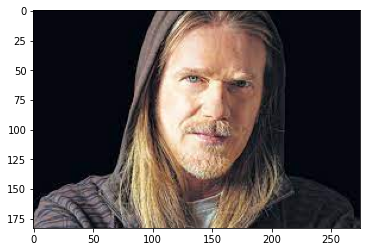

In [13]:
plt.imshow(img);


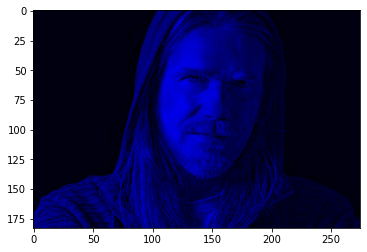

In [14]:
img2 = img.copy()
img2[:,:,1] = 0
img2[:,:,0] = 0
plt.imshow(img2)

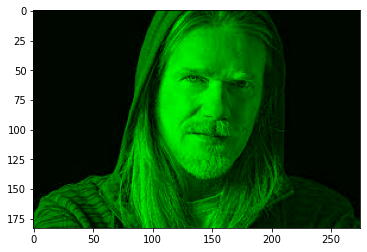

In [15]:
img3 = img.copy()
img3[:,:,2] = 0
img3[:,:,0] = 0
plt.imshow(img3)

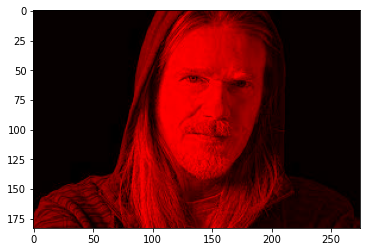

In [16]:
img4 = img.copy()
img4[:,:,2] = 0
img4[:,:,1] = 0
plt.imshow(img4)

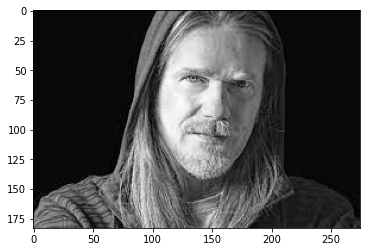

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

### Propriedades de imagem

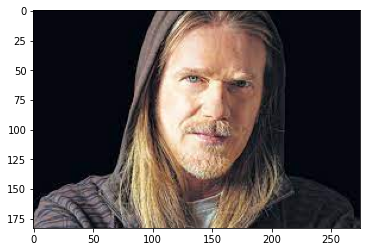

In [18]:
plt.imshow(img);

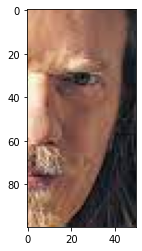

In [21]:
###cropping

x=150
y=30
w = 50
h = 100
plt.imshow(img[y:y+h, x:x+w])

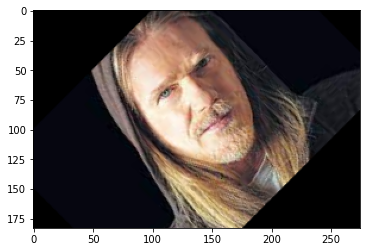

In [22]:
### rotate

height, width = img.shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image);

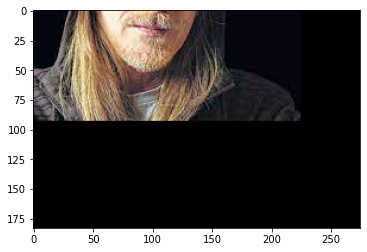

In [24]:
### translate

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(shifted);

### Filtros de suavização

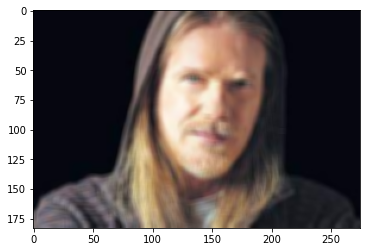

In [33]:
img_blur = cv2.blur(img,(5,5))
plt.imshow(img_blur);

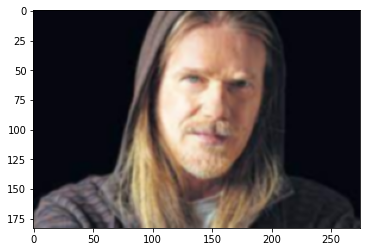

In [32]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur);

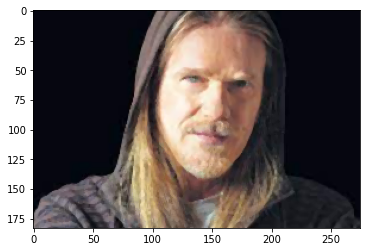

In [40]:
median = cv2.medianBlur(img,3)
plt.imshow(median);

### Filtros de bordas

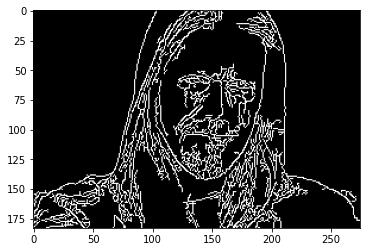

In [48]:
### Canny

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 10, 500)
plt.imshow(edged,cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


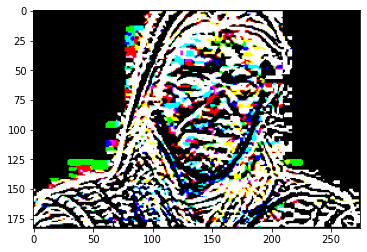

In [65]:
### Sobel X

sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobel_x,cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


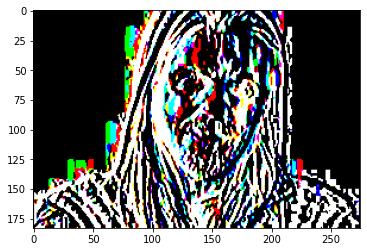

In [70]:
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobel_y,cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


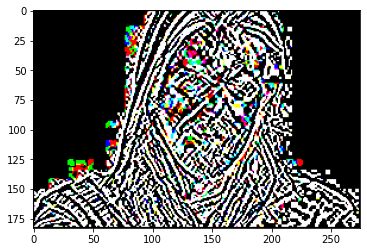

In [71]:
sobel_xy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel_xy,cmap='gray');

## Canny


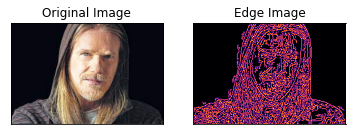

In [105]:
edges = cv2.Canny(img,20,60)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'inferno')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

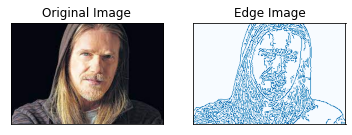

In [106]:
edges = cv2.Canny(img,60,120)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'Blues')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

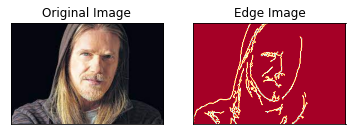

In [107]:
edges = cv2.Canny(img,200,600)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'RdYlBu')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Sharpen e outros filtros

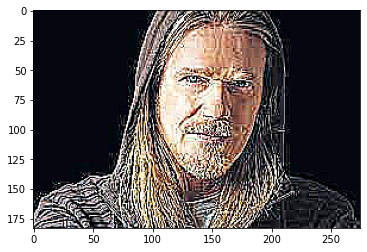

In [72]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen_img = cv2.filter2D(img, -1, kernel)
plt.imshow(sharpen_img);

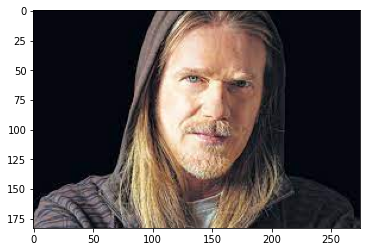

In [73]:
plt.imshow(img);

## Laplacian

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


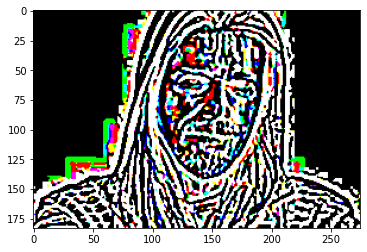

In [141]:
laplacian = cv2.Laplacian(img,cv2.CV_32FC1, ksize=9)
plt.imshow(laplacian)

### Equalização do histograma

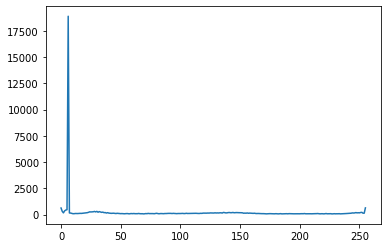

In [143]:
histr = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

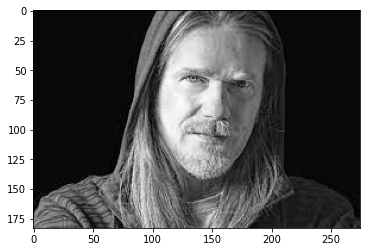

In [76]:
plt.imshow(img_gray, cmap='gray');

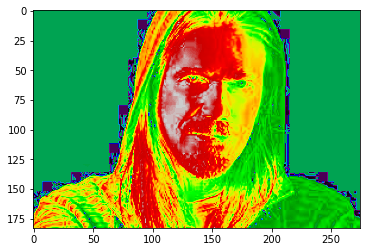

In [158]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_eq = cv2.equalizeHist(img_gray)
plt.imshow(img_eq, cmap='twilight');


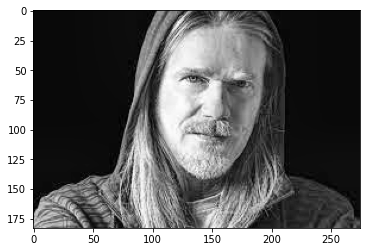

In [109]:
clahe = cv2.createCLAHE(clipLimit= 1.0,tileGridSize=(5,5))
cl1 = clahe.apply(img_gray)
plt.imshow(cl1, cmap='gray')

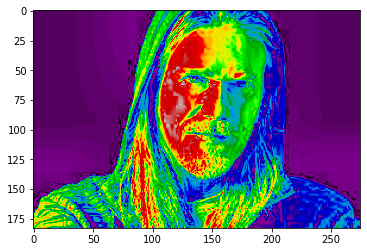

In [159]:
plt.imshow(cl1, cmap='nipy_spectral');

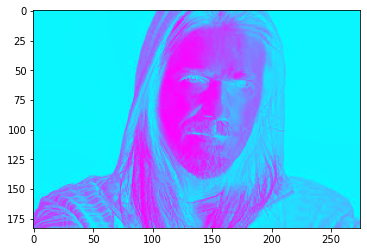

In [160]:
plt.imshow(cl1, cmap='cool');

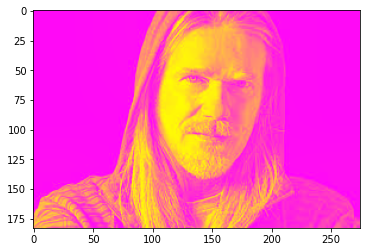

In [161]:
plt.imshow(cl1, cmap='spring');

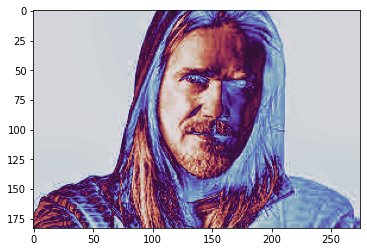

In [166]:
plt.imshow(cl1, cmap='twilight');

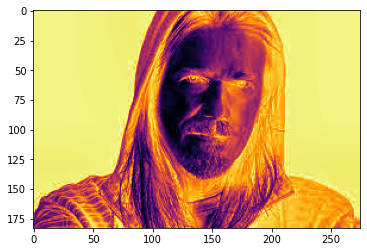

In [167]:
plt.imshow(cl1, cmap='inferno_r');

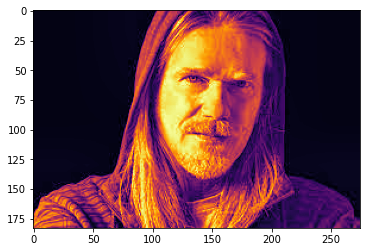

In [168]:
plt.imshow(cl1, cmap='inferno');